In [ ]:
import math
import pandas as pd;
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('fin_dat1.csv')

['.config', 'fin_dat1.csv', 'sample_data']


In [ ]:
dataset.head()

,Year,Per Capita Income (in Rs),Substitute,Population,Demand
0,1948,0.1299,0.28311,0.376325,6.400
1,1949,0.1303,0.29490,0.382377,6.462
2,1950,0.1309,0.31210,0.388799,6.183
3,1951,0.1313,0.35010,0.395544,7.501
4,1952,0.1321,0.43169,0.402579,8.017


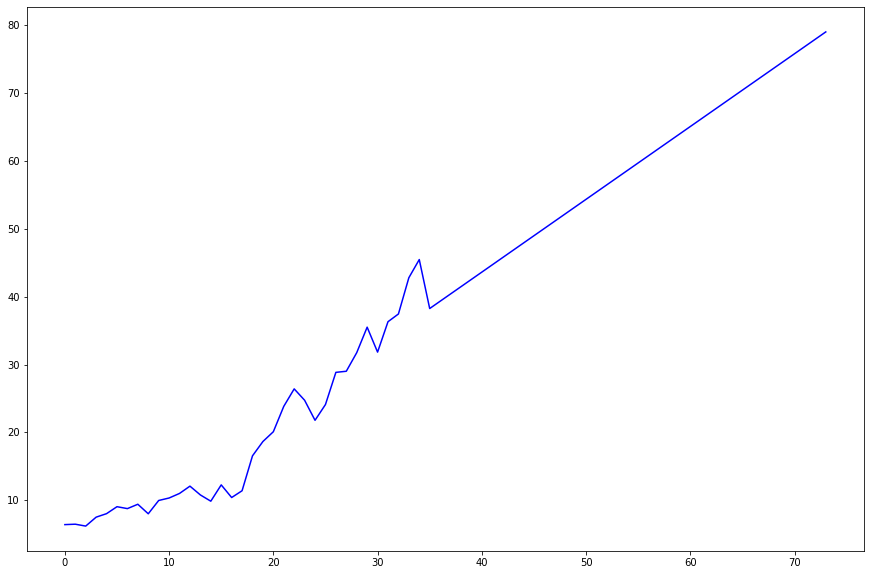

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dataset['Demand'], color='blue')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(dataset['Demand']).reshape(len(dataset['Demand']), 1))
series = pd.DataFrame(scaled)
series.columns = ['DemandScl']

In [ ]:
dataset = pd.merge(dataset, series, left_index=True, right_index=True)

In [ ]:
dataset.head()

,Year,Per Capita Income (in Rs),Substitute,Population,Demand,DemandScl
0,1948,0.1299,0.28311,0.376325,6.400,0.002979
1,1949,0.1303,0.29490,0.382377,6.462,0.003830
2,1950,0.1309,0.31210,0.388799,6.183,0.000000
3,1951,0.1313,0.35010,0.395544,7.501,0.018091
4,1952,0.1321,0.43169,0.402579,8.017,0.025174


In [ ]:
number_of_test_data = 5
number_of_holdout_data = 5
number_of_training_data = len(dataset) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(dataset), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 74 64 5 5


In [ ]:
datatrain = dataset[:number_of_training_data]
datatest = dataset[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = dataset[-number_of_holdout_data:]

In [ ]:
in_seq1 = array(datatrain['Per Capita Income (in Rs)'])
in_seq2 = array(datatrain['Substitute'])
in_seq3 = array(datatrain['Population'])
out_seq_train = array(datatrain['DemandScl'])

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [ ]:
datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, out_seq_train))

In [ ]:
in_seq1 = array(datatest['Per Capita Income (in Rs)'])
in_seq2 = array(datatest['Substitute'])
in_seq3 = array(datatest['Population'])
out_seq_test = array(datatest['DemandScl'])

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

In [ ]:
datatest_feed = hstack((in_seq1, in_seq2, in_seq3,out_seq_test))

In [ ]:
in_seq1 = array(datahold['Per Capita Income (in Rs)'])
in_seq2 = array(datahold['Substitute'])
in_seq3 = array(datahold['Population'])
out_seq_hold = array(datahold['DemandScl'])

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

In [ ]:
datahold_feed = hstack((in_seq1, in_seq2, in_seq3,out_seq_hold))

In [ ]:
n_features = datatrain_feed.shape[1]
n_input = 2
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

In [ ]:
generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

In [ ]:
generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

In [ ]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 2 4


In [ ]:
model = Sequential()

model.add(SimpleRNN(10, activation='relu', input_shape=(n_input, n_features), return_sequences = False))
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.fit_generator(generator_train, epochs=3000, verbose=2, validation_data=generator_test)

Epoch 1/3000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.6259 - 57ms/epoch - 57ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.6248 - 63ms/epoch - 63ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6237 - 61ms/epoch - 61ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6225 - 68ms/epoch - 68ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6214 - 68ms/epoch - 68ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6203 - 58ms/epoch - 58ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6192 - 59ms/epoch - 59ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.6181 - 58ms/epoch - 58ms/step
Epoch 509/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.6171 - 58ms/epoch - 58ms/step
Epoch 510/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.6160 - 57ms/epoch - 57ms/step
Epoch 511/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.6150 - 64ms/epoch - 64ms/step
Epoch 512/3000
1/1 - 0s - loss: 0.00

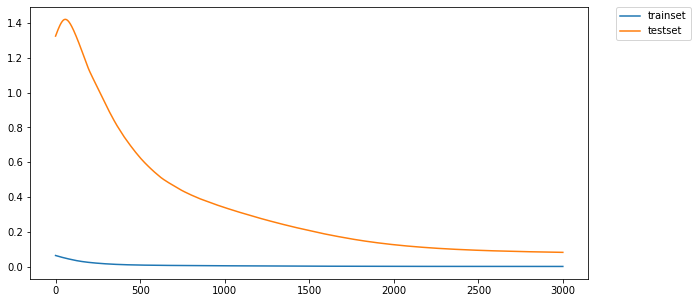

In [ ]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

1/1 - 0s - 134ms/epoch - 134ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step


In [ ]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']

In [ ]:
df_result

,Actual,Prediction,Diff
0,71.524,90.550346,26.601346
1,72.597,92.477455,27.384679
2,73.670,97.061958,31.752353


In [ ]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()
mse = (df_result['Actual']*df_result['Actual'] - df_result['Prediction']*df_result['Prediction']).abs().mean()
rmse=math.sqrt(mse)
print("mean: ", mean)
print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  77.96266666666666
mae: 40.64380407714844
mse: 7999.386914684693
rmse: 89.43929178322406
mae/mean ratio:  52.13239338121038 %
correctness:  47.86760661878962 %


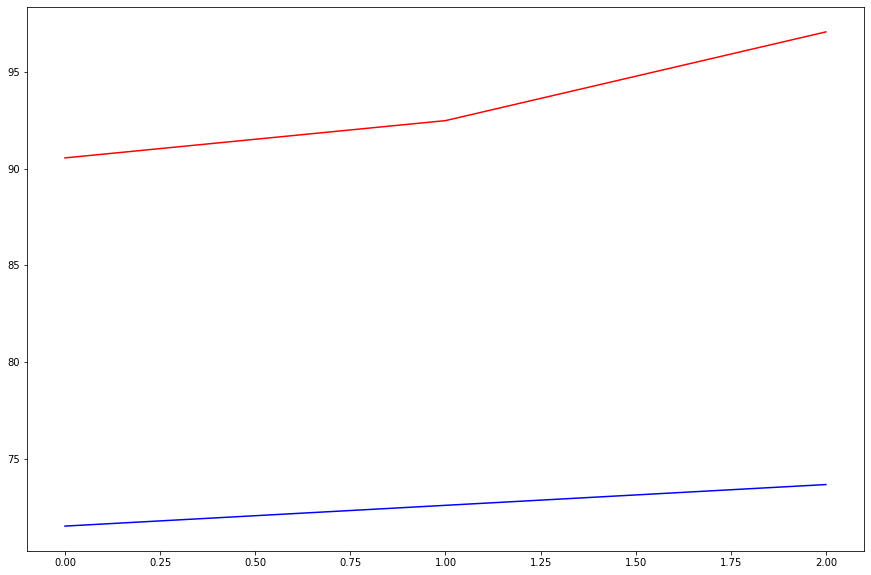

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [ ]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step


In [ ]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']

In [ ]:
df_result

,Actual,Prediction,Diff
0,76.889,114.110268,48.409093
1,77.963,119.808327,53.673315
2,79.036,121.900818,54.234549


In [ ]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()
mse = (df_result['Actual']*df_result['Actual'] - df_result['Prediction']*df_result['Prediction']).abs().mean()
rmse=math.sqrt(mse)
print("mean: ", mean)
print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  77.96266666666666
mae: 40.64380407714844
mse: 7999.386914684693
rmse: 89.43929178322406
mae/mean ratio:  52.13239338121038 %
correctness:  47.86760661878962 %


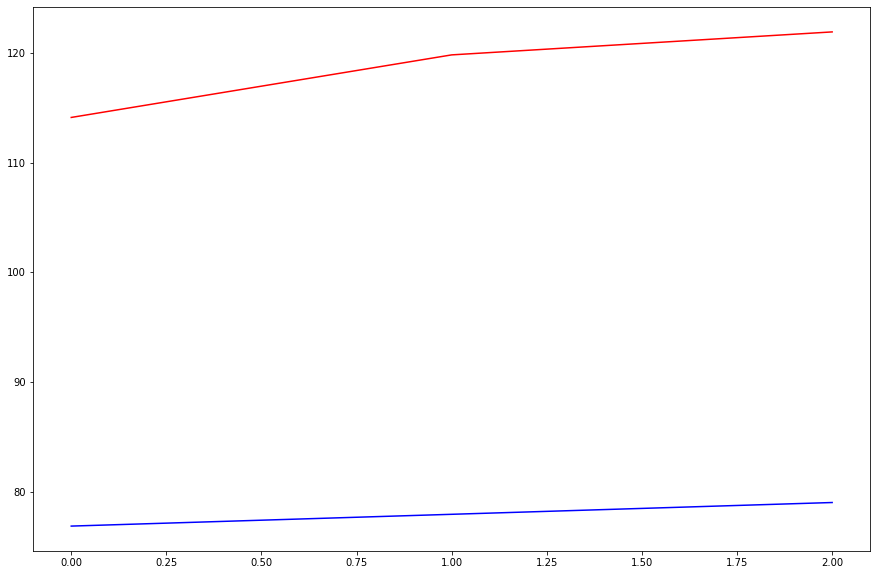

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()